> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No-Shows Appointments for Medical in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains data of around 100k medical appointments whether the patient showed up or not ? .

>Some additional information is also to each appointment such as: **gender, age, date of scheduling, date of actual appointment, neighborhood, scholarship, sms-reminder** etc.
>The possible options for these diseases are: **hypertension, diabetes, alcoholism, handicap.**

>The original dataset has been sourced from Kaggle Dataset: Medical Appointment No Shows on 29th October 2018.
>The data also keeps track of the following parameters **Scholarship,Hipertension , Diabetes , Alcoholism Handcap SMS_received**

### Exploratory Questions Which We Need To Answer :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

Here we're going to explore our dataset for checking:

1. What kind of variables(columns) we need to:

  a. convert the data type 
  
  b. drop from the dataset
  
  
2. Check duplicates
3. Check outliers
4. Gather more information about a specific variable
5. Check if we need to create more columns with usefull data for the exploration

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


All columns are in proper manner so we don't need to RANAME any columns heading

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


looking data above it is very clear that there is no null value inside "df". SO we need to remove unuseful data only


In [5]:
sum(df.duplicated())

0

Also there is no duplicate value. The data We are orovided is very clean as compare to normal data.

In [6]:
# let's see from which period theese appointments are
df.AppointmentDay.min(), df.AppointmentDay.max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

### General Observations :

**It looks like we have a good dataset:**

 >no missing lines

 >we need the Patient ID since it seems some patients try to make new appointments

 >there are no weird values on most columns

#### But we'll need to do some cleaning here:

1. we need to fix some data typings

>ScheduledDay and AppointmentDay makes sense to be a date/datetime type

2. No-Show makes sense to be a boolean
3. PatientId makes sense to be converted as string to prevent from being applied as a numerical operation since it represents the patient identification
4. Appointment ID seems to not be usefull for this analysis
5. Handcap variable have values beyond True and False, and we can see here that this occurs because the handcap field represents the number of patient disabilities

## Data Cleaning 


**1. remove useless columns**

In [7]:
df.drop(['AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood','Scholarship','Hipertension','Diabetes'], axis=1, inplace=True)
df.columns

Index(['PatientId', 'Gender', 'Age', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show'],
      dtype='object')

**2. rename the columns to use wisely while fixing data types**

In [8]:
df.rename(columns={'PatientId': 'patient_id','SMS_received': 'received_sms', 'No-show': 'no_show', 'Handcap': 'handicap' }, inplace=True)
df.rename(columns=lambda x: x.lower(), inplace=True)
df.columns

Index(['patient_id', 'gender', 'age', 'alcoholism', 'handicap', 'received_sms',
       'no_show'],
      dtype='object')

**3. removing Outliers**

In [9]:
# weird values from handcap
df.loc[df.handicap > 1, 'handicap'] = 1
df.handicap.unique()

array([0, 1])

In [10]:
#ages bellow zero
df = df.query('age >= 0')
print(sorted(df.age.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


**4. Formating Required Columns and its values**

In [11]:
# formatting the 'no_show' column with lower cases
df.no_show = df.no_show.map({ 'No': 'no', 'Yes': 'yes' })

df.no_show.unique()

array(['no', 'yes'], dtype=object)

In [12]:
# formatting the patient_id column as string
df.patient_id = df.patient_id.apply(lambda patient: str(int(patient)))

In [13]:
df.head(5)

,patient_id,gender,age,alcoholism,handicap,received_sms,no_show
0,29872499824296,F,62,0,0,0,no
1,558997776694438,M,56,0,0,0,no
2,4262962299951,F,62,0,0,0,no
3,867951213174,F,8,0,0,0,no
4,8841186448183,F,56,0,0,0,no


>**know that we have finished the cleaning work, we can save the cleaned dataframe to another .csv-file. We shall now continue with the explorative analysis**

In [14]:
df.to_csv('noshowappointments-May-2016-cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



In [15]:
dfc = pd.read_csv('noshowappointments-May-2016-cleaned.csv')
dfc.head()

,patient_id,gender,age,alcoholism,handicap,received_sms,no_show
0,29872499824296,F,62,0,0,0,no
1,558997776694438,M,56,0,0,0,no
2,4262962299951,F,62,0,0,0,no
3,867951213174,F,8,0,0,0,no
4,8841186448183,F,56,0,0,0,no


In [16]:
# Check the total amount of present
present = (dfc.no_show == 'no').sum()
present

88207

In [17]:
# Check the total amount of absent
absent = (df.no_show == 'yes').sum()
absent

22319

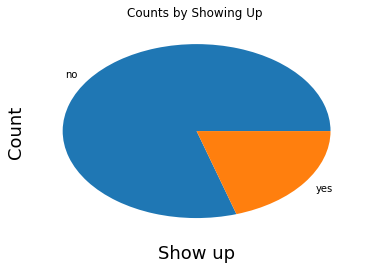

In [18]:
# Plot the bar chart for the present and absent
df['no_show'].value_counts().plot(kind='pie', title = 'Counts by Showing Up ')
plt.xlabel('Show up', fontsize=18)
plt.ylabel('Count', fontsize=18);

### Research Question 1

**Do SMS notifications coincide with fewer no shows?**

In [19]:
# Function for bar plot
def draw_bar(variable):
    dfc.groupby([variable, 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by '+variable+ ' Showing Up')
    plt.xlabel(variable, fontsize=18)
    plt.ylabel('Count', fontsize=18);

In [20]:
# Function for pie plot
def draw_pie(variable):
    dfc.groupby([variable, 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by '+variable+ ' Showing Up', autopct='%1.1f%%')
    plt.ylabel('');

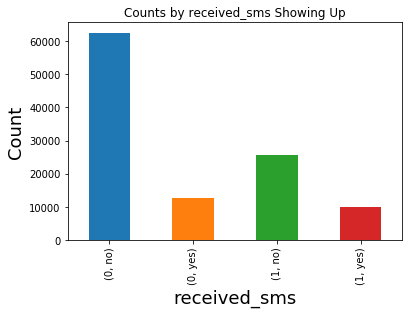

In [21]:
draw_bar('received_sms')

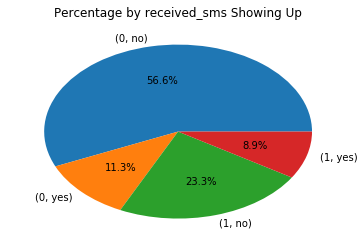

In [22]:
draw_pie('received_sms')

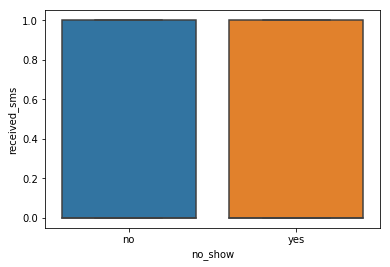

In [23]:
sns.boxplot(x=dfc.no_show, y=dfc.received_sms)
plt.show()

### Research Question 2  
**(What is the relationship between age and missed appointments?)**

In [24]:
#split into two data frames - one for No-show = No, one for No-show = Yes
df_n = dfc[dfc['no_show'] == 'no']
df_n['age'].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

In [25]:
df_y = dfc[dfc['no_show'] == 'yes']
df_y['age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

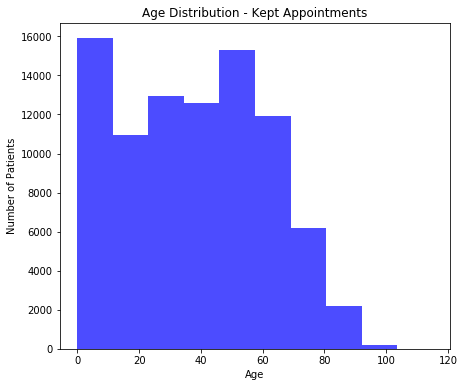

In [26]:
df_n['age'].plot(kind='hist', color = 'blue', figsize=(7,6), alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution - Kept Appointments');

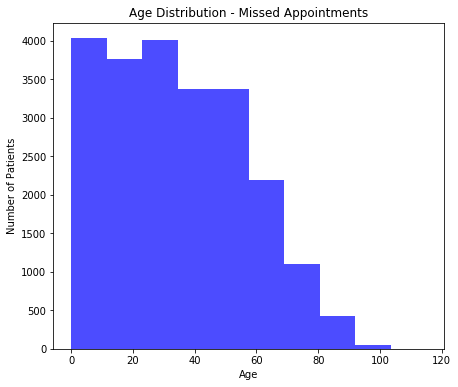

In [27]:
df_y['age'].plot(kind='hist', color='blue', figsize=(7,6), alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution - Missed Appointments');

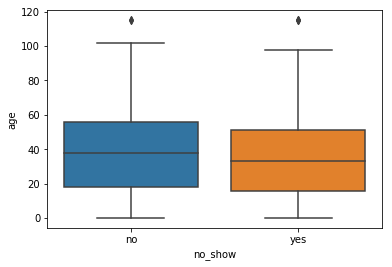

In [28]:
# display a box plot of the age distribution for each No Show condition
sns.boxplot(x=dfc.no_show, y=dfc.age)
plt.show()

The average age and quartiles are slightly lower for no_shows. A T-test can be used to determine if the difference of the means is significant

>The results show that there was a small but statistically significant difference.

### Research Question 3

**Does Gender play a role?**

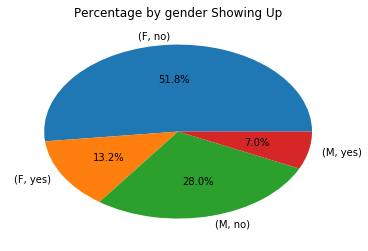

In [29]:
draw_pie('gender')

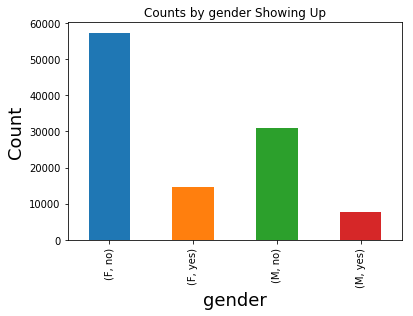

In [30]:
draw_bar('gender')

According to above visualization, It is clear that yes Gender plays an important role.

<a id='conclusions'></a>
## Conclusions

>Overall, we had some interesting findings. The most surprising is in the group of patients who kept their appointments, a smaller percentage recieved an SMS text about their appointment than the group that missed their appointments. 
**As we can see sending an SMS for the appiontment is not neccessary the right option to make sure that the patient will come**

>**Investigation the Age is the most important factor that decided if a patient would come or not the average of age for people who will be most likely to show up is 39.07 , and the average age for people who are not likely to show up is 35.32.**

>**The features such as different gender or alcoholic is not a factor to decide if the person would come to his appointment or not!**

>This was a preliminary analysis that does not include any modeling or hypothesis testing, therefore it is important to note that we have no evidence of statistical significance even in characteristics where we see differences in proportions.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0